## Data Cleaning
* Importing the Data Set(CSV)

* Observe the Data Set
    * Identify the rows/columns and their relation
    * Identify the Index Column (Primary key column)
    * Check if there are any duplicate columns 

* Assign the Index Column ( to avoid creation of new index column )
* Skip irrelevant Rows ( to avoid display of additional row index ) 
* Drop Duplicate of irrelevant columns


## Data Retrieval

* Index Column
    * dataframe.index
* column names
    * dataframe.columns
* rows
    * dataframe.values
* Particular column
    * dataframe[column name]
* first row
    * dataframe.values[0] ----> Returns an array of values in the row
    * dataframe.head(1)  ----> Returns a Sub Dataframe (Dataframe object)
    * dataframe.iloc[0]  ----> Returns a Series Object
    * datafram.loc[row name] ----> Returns a Series Object
* Single Cell Data
    * dataframe[*column name*][*row name*/row index] ----> direct referencing(column name)
    * dataframe.iloc[*row index*][*column name*] -----> calling iloc function
    * dataframe.loc[row name][column name]


In [45]:
import pandas as pd
import seaborn as sns

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [16]:
planets['orbital_period'].min()

0.09070629

In [20]:
planets['mass'].max()

25.0

In [15]:
planets.dropna().describe()
# dropna()  ---> droping rows with missing values
# describe()  ---> performs common aggrigations and returns result

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy

- GroupBy performs performs below three operations
    - split,apply,combine
![groupby](groupby.jpg)

In [8]:
planets.groupby('method')

In [9]:
planets.groupby('method')['mass']

In [25]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [49]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [59]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


In [63]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [9]:
n=int(input())
x=list(map(int,input().split()))
d={}
for i in x:
    if i in d:
        d[i]+=1
    else:
        d[i]=1
l=[]
for key,value in d.items():
    if value == 1:
        l.append(key)
l=sorted(l)
print(l)
# for i in l:
#     print(i,end=' ')

4 
1 2 3 2
[1, 3]


In [24]:
import pandas as pd
import numpy as np
s = pd.Series([1,2,3,4,5])
s.name='name'
t= pd.Series([2,3,4,5,6,89])
s[~s.isin(t)]

0    1
Name: name, dtype: int64

In [36]:
s.value_counts()

5    1
4    1
3    1
2    1
1    1
Name: name, dtype: int64

In [33]:
# Input
state = np.random.RandomState(100)
ser = pd.Series(state.normal(10, 5, 10))
ser

0     1.251173
1    11.713402
2    15.765179
3     8.737820
4    14.906604
5    12.571094
6    11.105898
7     4.649783
8     9.052521
9    11.275007
dtype: float64

In [35]:
np.percentile(ser,[0,25,50,75,100])

array([ 1.25117263,  8.81649507, 11.19045278, 12.35667116, 15.76517901])

## Guess the Number

Write a programme where the computer randomly generates a number between 0 and 20. The user needs to guess what the number is. If the user guesses wrong, tell them their guess is either too high, or too low. This will get you started with the random library if you haven't already used it.

In [39]:
import random

n = random.randint(0,20)
guess = int(input())
if guess>n:
    print('Too High')
elif guess<n:
    print('Too Low')
else:
    print('Correct !')

5
Too Low


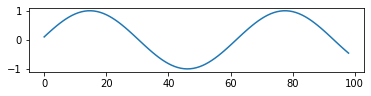

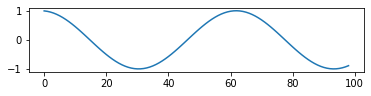

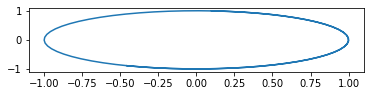

In [89]:
import matplotlib.pyplot as plt
t = np.arange(0.1,10,0.1)
sine = np.sin(t)
cosine = np.cos(t)

plt.subplot(3,1,1)
plt.plot(sine)
plt.show()

plt.subplot(3,1,2)
plt.plot(cosine)
plt.show()

plt.subplot(3,1,1)
plt.plot(sine,cosine)
plt.show()

In [8]:
import numpy as np
import pandas as pd
marks = [1,1,1,5,5,7,7,7,7,100]
pd.Series(marks).median()
pd.Series(marks).mean()
pd.Series(marks).mode()

0    7
dtype: int64

In [11]:
marks.sort()
marks

[1, 1, 1, 5, 5, 7, 7, 7, 7, 100]

In [11]:
string='abracadabra'
position = 5
character = 'k'
x=''
for i in range(len(string)):
    if i==position:
        x=x+character
    else:
        x=x+string[i]
print(x)

abrackdabra


In [14]:
s=input()
x=list()
x

[1,2,3,4,5]


[]

In [3]:
string=input()
sub_string=input()
main = len(string)
sub = len(sub_string)
i=0
c=0
while main-i>=sub:
    if string[i:i+sub]==sub_string:
        c=c+1
    i=i+1
print(c)

abcdcdc
cdc
2


In [17]:
s=input()
f=0
for i in s:
    if i.isdigit():
        f=f+1
    if i.isalpha():
        f=f+1
    if f>=2:
        print(True)
        break
if f==0:
    print(False)
f=0
for i in s:
    if i.isalpha():
        f=1
        print(True)
        break
if f==0:
    print(False)
f=0
for i in s:
    if i.isdigit():
        f=1
        print(True)
        break
if f==0:
    print(False)
f=0
for i in s:
    if i.islower():
        f=1
        print(True)
        break
if f==0:
    print(False)
f=0
for i in s:
    if i.isupper():
        f=1
        print(True)
        break
if f==0:
    print(False)
        

#$%@^&*kjnk svskjnbui h 4oi3hheuh /dfh uidshvhdsuihv suihc 0hrem89m4c02mw4xo;,wh fwhncoishmxlxfkjsahnxu83v 08 n8OHOIHIOMOICWHOFCMHEOFMCOEJMC0J09C 03J J3L;JMFC3JM3JC3'JIOO9MMJ099U N090N9 OOHOLNHNLLKNLKNKNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333000000000000000000000000000000000000000000000000000000000000000000000000000
True
True
True
True
True


In [23]:
import textwrap
s=input()
x = textwrap.TextWrapper(width = 4)
lis = x.wrap(text=s)
for i in lis:
    print(i)

asdjfh qwiecajkcfasdf
asdj
fh q
wiec
ajkc
fasd
f


**Input** : x1 = [9,3,1,7,2,8,4,7] <br>
**Output** : x1 = [1,3,7,9,8,7,4,2]

In [32]:
l1=list(map(int,input().split()))
if len(l1)%2==0:
    l1 = sorted(l1[0:len(l1)//2]) + sorted(l1[len(l1)//2:],reverse = True )
else:
    l1 = sorted(l1[0:len(l1)//2]) + list(l1[len(l1)//2]) + sorted(l1[len(l1)//2+1:],reverse = True)
l1

6 2 3 1 5 4 2 3


[1, 2, 3, 6, 5, 4, 3, 2]

In [53]:
n=int(input())
space = len(bin(n).split('b')[1])
s = ''
for i in range(1,n+1):
    print(str(i)+space*' '+oct(i).split('o')[1]+space*' '+hex(i).split('x')[1]+space*' '+bin(i).split('b')[1])
    

17
1     1     1     1
2     2     2     10
3     3     3     11
4     4     4     100
5     5     5     101
6     6     6     110
7     7     7     111
8     10     8     1000
9     11     9     1001
10     12     a     1010
11     13     b     1011
12     14     c     1100
13     15     d     1101
14     16     e     1110
15     17     f     1111
16     20     10     10000
17     21     11     10001


In [70]:
s=input()
s = s.split()
x=''
for i in s:
    if i[0].islower():
        x=x+i[0].upper()+i[1:]+' '
    else:
        x=x+i+' '
x[0:-1]

1 w 2 r 3g


'1 W 2 R 3g'

In [72]:
x=input()
x.isalnum()

1 w 2 r 3g


False

In [75]:
input().split()

1 2 3 4


['1', '2', '3', '4']

In [82]:
s ={1,2}
s.add(4)
s

{1, 2, 4}

In [86]:
m=int(input())
x1=set(map(int,input().split()))
n=int(input())
x2=set(map(int,input().split()))
l1=x1.difference(x2)
l2=x2.difference(x1)
s = l1.union(l2)
for i in s:
    print(i)
    

4
2 4 5 9
4
2 4 11 12


{5, 9, 11, 12}

In [3]:
l=input().split()
x=[]
for i in l:
    x.append(i)
print(x)

1.1 2 3 4.5
['1.1', '2', '3', '4.5']


In [4]:
import numpy
n=int(input())
l=[]
for i in range(n):
    l.append(list(map(float,input().split())))
print(numpy.linalg.det(l))

2
1.1 1.1
1.1 1.2
0.10999999999999982


In [8]:
x=[1,2,4]
numpy.array(x).mean()

2.3333333333333335

In [2]:
n=int(input())
print(1)
for i in range(2,n+1):
    k=i
    for j in range(i):
        print(i,k+i+1,end=' ')
    print('\n')

5
1
2 5 2 5 

3 7 3 7 3 7 

4 9 4 9 4 9 4 9 

5 11 5 11 5 11 5 11 5 11 



In [ ]:
1
2 9
3 8 10
4 7 11 14
5 6 12 13 15

In [8]:
import re
word = 'love'
if re.findall(word,'lovetoeat'):
    print('siri')


siri


In [12]:
s = "welcome"
s[2::]
s[::-4]
s.count('l')

1

In [14]:
print('abcdef'.center(10,'12'))

TypeError: The fill character must be exactly one character long

In [15]:
print("ab\tcd\tef".expandtabs(4))

ab  cd  ef


In [16]:
"ab cd-ef".title()

'Ab Cd-Ef'

In [17]:
b = [11,23,45,6,7,8]
b[::2]

[11, 45, 7]

In [18]:
'hello'[2:999]

'llo'

In [40]:
import random
a = [1,2,3,4,5]
a[3:0:-1]
random.shuffle(a)
a

[3, 2, 5, 4, 1]

In [42]:
a.reverse()
a

[1, 4, 5, 2, 3]